# Twitter Sentiment Analysis

# Problem Statement
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

In [5]:
#importing all libraries
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [6]:
#Let’s read train and test datasets
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:

Data Inspection
Data Cleaning

# Data Inspection

In [7]:
#visualise train data
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [8]:
#visualizing test data
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦


In [9]:
#Let’s check out a few non racist/sexist tweets.
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [10]:
#check out a few racist/sexist tweets.
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [11]:
#info of training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
#info of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [13]:
#label distribution in train dataset
train['label'].value_counts()
#In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

0    29720
1     2242
Name: label, dtype: int64

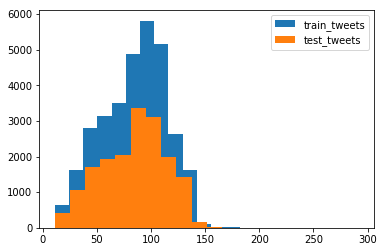

In [14]:
# distribution of length of the tweets, in terms of words, in both train and test data.
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show() 

# Data Cleaning

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

In [15]:
#a user-defined function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    

We will be following the steps below to clean the raw tweets in out data.

1)We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

2)We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

3)Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

4)Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

In [16]:
#Removing Twitter Handles (@user) in train and test dataset
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*") #regular expression which will pick any word starting with ‘@’.
train.head()
test['tidy_tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*") 
test.head()

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite","is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦","3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [17]:
#Removing Punctuations, Numbers, and Special Characters from both datasets
#The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
train.head(10)
test['tidy_tweet'] = test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
test.head(10)

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterials
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists want everyone to see the new #birds #movie and here s why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways to heal your #acne #altwaystoheal #healthy #healing
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",is the hp and the cursed child book up for reservations already if yes where if no when #harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",rd #bihday to my amazing hilarious #nephew eli ahmir uncle dave loves you and misses
5,31968,choose to be :) #momtips,choose to be #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes ness #smokeyeyes #tired #lonely #sof #grungeâ¦,something inside me dies eyes ness #smokeyeyes #tired #lonely #sof #grunge
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!,#finished#tattoo#inked#ink#loveit # #thanks#aleeee
8,31971,@user @user @user i will never understand why my dad left me when i was so young.... :/ #deep #inthefeels,i will never understand why my dad left me when i was so young #deep #inthefeels
9,31972,#delicious #food #lovelife #capetown mannaepicure #resturantâ¦,#delicious #food #lovelife #capetown mannaepicure #resturant


In [18]:
#Removing Short Words
#We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['tidy_tweet'] = test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head()
test.head()

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolife #aislife #requires #passion #dedication #willpower find #newmaterials
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacists want everyone #birds #movie here
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways heal your #acne #altwaystoheal #healthy #healing
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",cursed child book reservations already where when #harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amazing hilarious #nephew ahmir uncle dave loves misses


In [19]:
#Text Normalization
#Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.
tokenized_train_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_train_tweet.head()
tokenized_test_tweet = test['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_test_tweet.head()

0         [#studiolife, #aislife, #requires, #passion, #dedication, #willpower, find, #newmaterials]
1                                      [#white, #supremacists, want, everyone, #birds, #movie, here]
2                                [safe, ways, heal, your, #acne, #altwaystoheal, #healthy, #healing]
3    [cursed, child, book, reservations, already, where, when, #harrypotter, #pottermore, #favorite]
4                          [#bihday, amazing, hilarious, #nephew, ahmir, uncle, dave, loves, misses]
Name: tidy_tweet, dtype: object

In [20]:
#Now we can normalize the tokenized tweets
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_train_tweet = tokenized_train_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_test_tweet = tokenized_test_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_train_tweet.head()
tokenized_test_tweet.head()

0           [#studiolif, #aislif, #requir, #passion, #dedic, #willpow, find, #newmateri]
1                              [#white, #supremacist, want, everyon, #bird, #movi, here]
2                            [safe, way, heal, your, #acn, #altwaystoh, #healthi, #heal]
3    [curs, child, book, reserv, alreadi, where, when, #harrypott, #pottermor, #favorit]
4                        [#bihday, amaz, hilari, #nephew, ahmir, uncl, dave, love, miss]
Name: tidy_tweet, dtype: object

In [21]:
#let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_train_tweet)):
    tokenized_train_tweet[i] = ' '.join(tokenized_train_tweet[i])    
train['tidy_tweet'] = tokenized_train_tweet
train.head()

for i in range(len(tokenized_test_tweet)):
    tokenized_test_tweet[i] = ' '.join(tokenized_test_tweet[i])    
test['tidy_tweet'] = tokenized_test_tweet
test.head()

,id,tweet,tidy_tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,#studiolif #aislif #requir #passion #dedic #willpow find #newmateri
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,#white #supremacist want everyon #bird #movi here
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe way heal your #acn #altwaystoh #healthi #heal
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",curs child book reserv alreadi where when #harrypott #pottermor #favorit
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",#bihday amaz hilari #nephew ahmir uncl dave love miss


# Visualization from Tweets

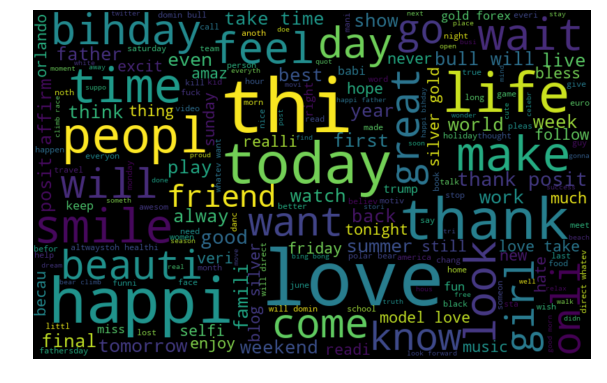

In [22]:
#Understanding the common words used in the tweets: WordCloud
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.
#train set
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()
#We can see most of the words are positive or neutral.

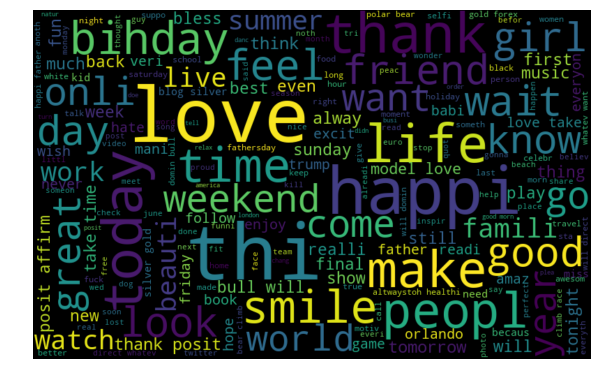

In [23]:
#test set
all_words = ' '.join([text for text in test['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()
#We can see most of the words are positive or neutral.

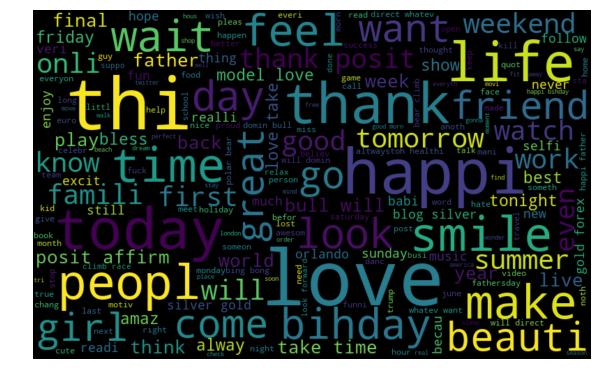

In [24]:
#Words in non racist/sexist tweets
#train set
normal_words =' '.join([text for text in train['tidy_tweet'][train['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

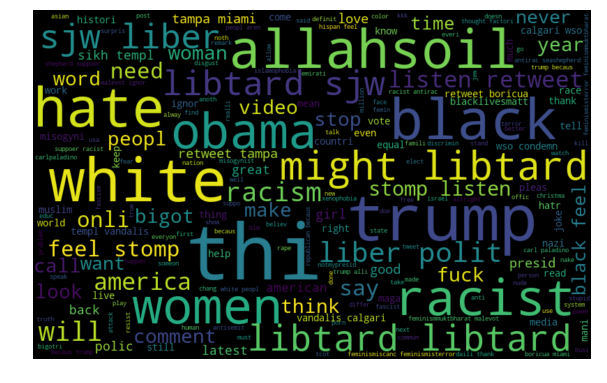

In [25]:
#Racist/Sexist Tweets
negative_words = ' '.join([text for text in train['tidy_tweet'][train['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.
For instance, given below is a tweet from our dataset:

"wat has today's attitude to women got in common with that of normal bates?#psycho#feminism#hollaback"

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.
We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [26]:
# function to collect hashtags 
def hashtag_extract(x):   
    hashtags = []   
    for i in x: # Loop over the words in the tweet    
        ht = re.findall(r"#(\w+)", i)       
        hashtags.append(ht)    
    return hashtags
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(train['tidy_tweet'][train['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

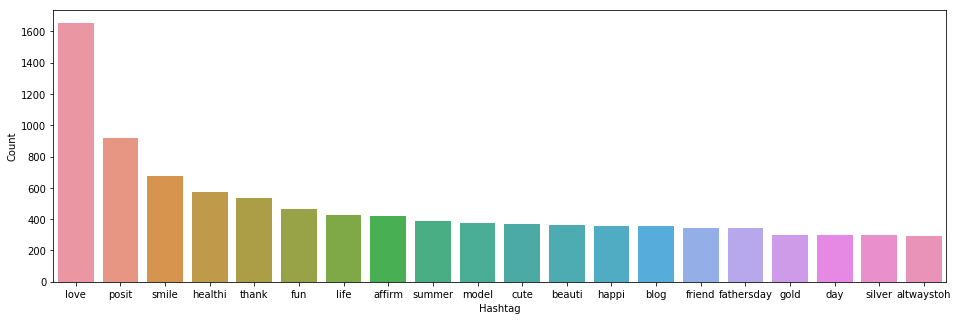

In [27]:
#plotting top 20 non racist hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

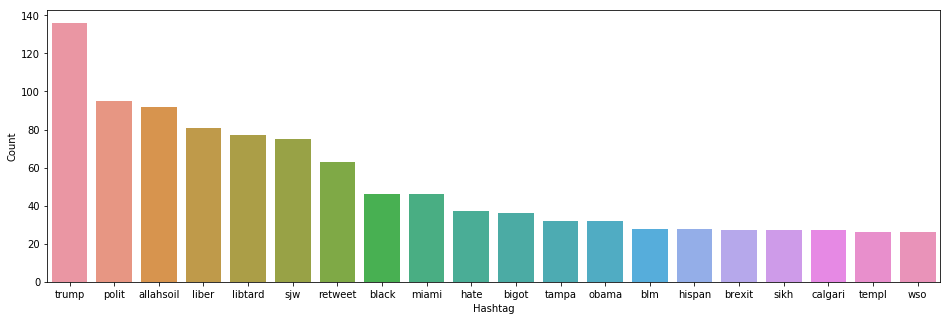

In [28]:
#plotting top 20 racist hashtags
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

# Bag of words features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings.

Let’s start with the Bag-of-Words Features.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.
D1: He is a lazy boy. She is also lazy.
D2: Smith is a lazy person.
The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]
Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
        He      She     lazy    boy   Smith    person
D1      1        1       2       1      0        0
D2      0        0       1       0      1        1
Now the columns in the above matrix can be used as features to build a classification model.

In [29]:
#bag of words features
#train set
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
bow_vectorizer_train = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow1 = bow_vectorizer_train.fit_transform(train['tidy_tweet']) 
bow1.shape

(31962, 1000)

In [30]:
#test set
bow_vectorizer_test = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow2 = bow_vectorizer_test.fit_transform(test['tidy_tweet']) 
bow2.shape

(17197, 1000)

# TF-IDF Features

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

1)TF = (Number of times term t appears in a document)/(Number of terms in the document)

2)IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

3)TF-IDF = TF*IDF

In [31]:
#train set
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf_train = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf_train.shape

(31962, 1000)

In [32]:
#test set
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf_test = tfidf_vectorizer.fit_transform(test['tidy_tweet'])
tfidf_test.shape

(17197, 1000)

# Word to Vec features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

The advantages of using word embeddings over BOW or TF-IDF are:
1)Dimensionality reduction - significant reduction in the no. of features required to build a model.
2)It capture meanings of the words, semantic relationships and the different types of contexts they are used in.

1. Word2Vec Embeddings

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

Google News Word Vectors
Freebase names
DBPedia vectors (wiki2vec)

However, for this course, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

In [33]:
#train a Word2Vec model on our corpus(train)
import gensim
tokenized_train_tweet = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
train_model_w2v = gensim.models.Word2Vec(
            tokenized_train_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
train_model_w2v.train(tokenized_train_tweet, total_examples= len(train['tidy_tweet']), epochs=20)

(4162035, 4904460)

In [34]:
#train a Word2Vec model on our corpus(test)
tokenized_test_tweet = test['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
test_model_w2v = gensim.models.Word2Vec(
            tokenized_test_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
test_model_w2v.train(tokenized_test_tweet, total_examples= len(test['tidy_tweet']), epochs=20)

(2159848, 2631560)

In [35]:
#Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus
train_model_w2v.wv.most_similar(positive="dinner")
test_model_w2v.wv.most_similar(positive="dinner")
train_model_w2v.wv.most_similar(positive="trump")
test_model_w2v.wv.most_similar(positive="trump")

[('businessman', 0.650428831577301),
 ('phoni', 0.6496414542198181),
 ('churchil', 0.6425294280052185),
 ('appal', 0.6392155885696411),
 ('fraud', 0.6368906497955322),
 ('hillari', 0.6339267492294312),
 ('potu', 0.6314705014228821),
 ('clinton', 0.630455493927002),
 ('cower', 0.6270335912704468),
 ('incap', 0.6263917684555054)]

In [36]:
#From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

# Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [37]:
#train
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += train_model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_train_tweet), 200)) 
for i in range(len(tokenized_train_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_train_tweet[i], 200)
    wordvec_train_df = pd.DataFrame(wordvec_arrays)
wordvec_train_df.shape  #Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

(31962, 200)

In [38]:
#train
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += test_model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     
            continue
    if count != 0:
        vec /= count
    return vec

#Preparing word2vec feature set…
wordvec_arrays = np.zeros((len(tokenized_test_tweet), 200)) 
for i in range(len(tokenized_test_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_test_tweet[i], 200)
    wordvec_test_df = pd.DataFrame(wordvec_arrays)
wordvec_test_df.shape  #Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

(17197, 200)

#  Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

In [39]:
#Let’s load the required libraries.
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [40]:
#To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.
#train
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_train_tweets = add_label(tokenized_train_tweet) # label all the tweets
labeled_train_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [41]:
#test
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_test_tweets = add_label(tokenized_test_tweet) # label all the tweets
labeled_test_tweets[:6]

[LabeledSentence(words=['#studiolif', '#aislif', '#requir', '#passion', '#dedic', '#willpow', 'find', '#newmateri'], tags=['tweet_0']),
 LabeledSentence(words=['#white', '#supremacist', 'want', 'everyon', '#bird', '#movi', 'here'], tags=['tweet_1']),
 LabeledSentence(words=['safe', 'way', 'heal', 'your', '#acn', '#altwaystoh', '#healthi', '#heal'], tags=['tweet_2']),
 LabeledSentence(words=['curs', 'child', 'book', 'reserv', 'alreadi', 'where', 'when', '#harrypott', '#pottermor', '#favorit'], tags=['tweet_3']),
 LabeledSentence(words=['#bihday', 'amaz', 'hilari', '#nephew', 'ahmir', 'uncl', 'dave', 'love', 'miss'], tags=['tweet_4']),
 LabeledSentence(words=['choos', '#momtip'], tags=['tweet_5'])]

In [42]:
#train
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_train_tweets)])
model_d2v.train(labeled_train_tweets, total_examples= len(train['tidy_tweet']), epochs=15)

C:\Users\KIIT\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|████████████████████████████████████████████████████████████████████████| 31962/31962 [00:00<00:00, 631805.30it/s]


In [43]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_train_tweet), 200)) 
for i in range(len(train)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_train_df = pd.DataFrame(docvec_arrays) 
docvec_train_df.shape

(31962, 200)

In [44]:
#train
#Now let’s train a doc2vec model.
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_test_tweets)])
model_d2v.train(labeled_test_tweets, total_examples= len(test['tidy_tweet']), epochs=15)

C:\Users\KIIT\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|███████████████████████████████████████████████████████████████████████| 17197/17197 [00:00<00:00, 1666037.92it/s]


In [45]:
#Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_test_tweet), 200)) 
for i in range(len(test)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_test_df = pd.DataFrame(docvec_arrays) 
docvec_test_df.shape

(17197, 200)

# Modelling

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
#Bag-of-Words Features

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow1, train['label'],random_state=42,test_size=0.3)
lreg = LogisticRegression() 
lreg.fit(xtrain_bow, ytrain) # training the model 
prediction = lreg.predict_proba(xvalid_bow)# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5328892589508742

In [48]:
#we dont have the actual results of test file. This code is to generate a csv file with test set predictions

'''''test_pred = lreg.predict_proba(bow2) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)''' # writing data to a CSV file

#Public Leaderboard F1 Score: 0.567 = f1 score of test set

"''test_pred = lreg.predict_proba(bow2) \ntest_pred_int = test_pred[:,1] >= 0.3 \ntest_pred_int = test_pred_int.astype(np.int)\ntest['label'] = test_pred_int \nsubmission = test[['id','label']]\nsubmission.to_csv('sub_lreg_bow.csv', index=False)"

In [49]:
#TF-IDF Features

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf_train, train['label'],random_state=42,test_size=0.3)
lreg = LogisticRegression() 
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf)# predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

#Public Leaderboard F1 Score: 0.564

0.5319148936170213

In [50]:
#Word2Vec Features

xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(wordvec_train_df, train['label'],random_state=42,test_size=0.3)
lreg = LogisticRegression() 
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

#Public Leaderboard F1 Score: 0.661

0.6042296072507553

In [51]:
#Doc2Vec Features

xtrain_d2v, xvalid_d2v, ytrain, yvalid = train_test_split(docvec_train_df, train['label'],random_state=42,test_size=0.3)
lreg = LogisticRegression() 
lreg.fit(xtrain_d2v, ytrain) 
prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

#Public Leaderboard F1 Score: 0.381

0.38743455497382207

# SVM

In [52]:
from sklearn import svm

In [53]:
#Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5022914757103575

In [54]:
#we dont have the actual results of test file. This code is to generate a csv file with test set predictions

''''test_pred = svc.predict_proba(bow2) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)'''

#Public Leaderboard F1 Score: 0.554

"'test_pred = svc.predict_proba(bow2) \ntest_pred_int = test_pred[:,1] >= 0.3 \ntest_pred_int = test_pred_int.astype(np.int) \ntest['label'] = test_pred_int \nsubmission = test[['id','label']] \nsubmission.to_csv('sub_svm_bow.csv', index=False)"

In [55]:
#TF-IDF Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

#Public Leaderboard F1 Score: 0.546

0.5211141060197664

In [56]:
#Word2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

#Public Leaderboard F1 Score: 0.654

0.5884194053208138

In [57]:
#Doc2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

#Public Leaderboard F1 Score: 0.214

0.2566844919786096

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#Bag-of-Words Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5511811023622046

In [60]:
#we dont have the actual results of test file. This code is to generate a csv file with test set predictions

'''''test_pred = rf.predict(bow2)
test['label'] = test_pred 
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)'''

#Public Leaderboard F1 Score: 0.598

"''test_pred = rf.predict(bow2)\ntest['label'] = test_pred \nsubmission = test[['id','label']]\nsubmission.to_csv('sub_rf_bow.csv', index=False)"

In [61]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

#Public Leaderboard F1 Score: 0.589

0.5636856368563686

In [62]:
#Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

#Public Leaderboard F1 Score: 0.549

0.5117773019271948

In [63]:
#Doc2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

#Public Leaderboard F1 Score: 0.07

0.08100558659217877

# XGBoost

In [64]:
from xgboost import XGBClassifier

In [65]:
#Bag-of-Words Features
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5240253853127833

In [66]:
#we dont have the actual results of test file. This code is to generate a csv file with test set predictions

'''''test_pred = xgb_model.predict(test_bow) 
test['label'] = test_pred 
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)'''

#Public Leaderboard F1 Score: 0.554

"''test_pred = xgb_model.predict(test_bow) \ntest['label'] = test_pred \nsubmission = test[['id','label']]\nsubmission.to_csv('sub_xgb_bow.csv', index=False)"

In [67]:
#TF-IDF Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

#Public Leaderboard F1 Score: 0.554

0.5601436265709155

In [68]:
#Word2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

#Public Leaderboard F1 Score: 0.698
#XGBoost model on word2vec features has outperformed all the previuos models in this course.

0.6467931345980127

In [69]:
#Doc2Vec Features

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v) 
f1_score(yvalid, prediction)
         
#Public Leaderboard F1 Score: 0.374

0.38197424892703863